In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from google.cloud import bigquery
from bq_helper import BigQueryHelper
import os
from common_funcs import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [3]:
main_table = remove_unnamed_cols(pd.read_csv('main_table.csv'))
main_table['lsc17'] = np.log(main_table['sec_commits17'] + 0.01)
main_table['lsc18'] = np.log(main_table['sec_commits18_times4'] + 0.01)
main_table['lsc_diff'] = main_table['lsc18'] - main_table['lsc17']
main_table['l_mc'] = np.log(main_table['main_commits'])
main_table['code_comments_avg'] = main_table['code_comments'] / main_table['code_loc']
main_table['code_single_comments_avg'] = main_table['code_single_comments'] / main_table['code_loc']

In [7]:
main_table.head().to_string()

'   project_id                name  readme_len  readme_size  readme_headers  pipeline_status  url_count  img_count  code_files  code_files_examined  code_loc  code_lloc  code_sloc  code_comments  code_multi  code_blank  code_single_comments  code_functions_complexity  code_classes_complexity  total_complexity  code_halstead_h1  code_halstead_h2  code_halstead_N1  code_halstead_N2  code_halstead_vocabulary  code_halstead_length  code_halstead_calculated_length  code_halstead_volume  code_halstead_difficulty  code_halstead_effort  code_halstead_time  code_halstead_bugs  code_pylint_score                                                url  main_commits  sec_commits17  sec_commits18  cloned  sec_commits18_times4  sc17_cat  sc18_cat  sc_diff  sc_diff_sign  code_files_avg  code_files_examined_avg  code_loc_avg  code_lloc_avg  code_sloc_avg  code_comments_avg  code_multi_avg  code_blank_avg  code_single_comments_avg  code_functions_complexity_avg  code_classes_complexity_avg  code_halstead_h1

In [30]:
fig, ax = plt.subplots()
main_table.plot(kind='scatter', x='code_halstead_difficulty_avg', y='lsc_diff', ax=ax, alpha=0.2)
ax.set_xlim(-2,2)
ax.set_ylim(-10,10)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


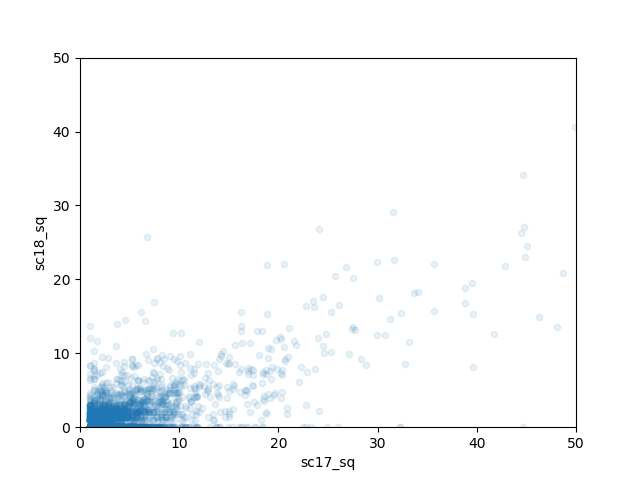

In [15]:
temp_table = main_table[main_table['sec_commits17'] < 5]
fig = plt.figure()
ax = plt.gca()
main_table['sc17_sq'] = np.power(main_table['sec_commits17'], 0.5)
main_table['sc18_sq'] = np.power(main_table['sec_commits18'], 0.5)
main_table.plot.scatter(x='sc17_sq', y='sc18_sq', ax=ax, alpha=0.1)
ax.set_xlim(0,50)
ax.set_ylim(0,50)
plt.show()

In [166]:
fig = plt.figure()
ax = plt.gca()
main_table.plot.scatter(x='main_commits', y='lsc_diff', ax=ax)
ax.set_xlim(0,100)
ax.set_ylim(0,6)
plt.show()

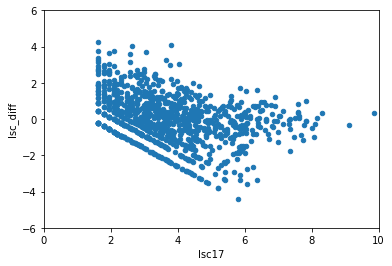

In [167]:
fig = plt.figure()
ax = plt.gca()
temp_table.plot.scatter(x='', y='lsc_diff', ax=ax)
ax.set_xlim(0,10)
ax.set_ylim(-6,6)
plt.show()

In [50]:
y = main_table['lsc_diff']
X = main_table['l_mc']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               lsc_diff   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     2482.
Date:                Thu, 21 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:38:46   Log-Likelihood:                -9136.7
No. Observations:                5122   AIC:                         1.828e+04
Df Residuals:                    5121   BIC:                         1.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
l_mc          -0.3060      0.006    -49.818      0.0

In [135]:
np.log(1.01) - np.log(2.01)

-0.6881843912178162

2268


<IPython.core.display.Javascript object>


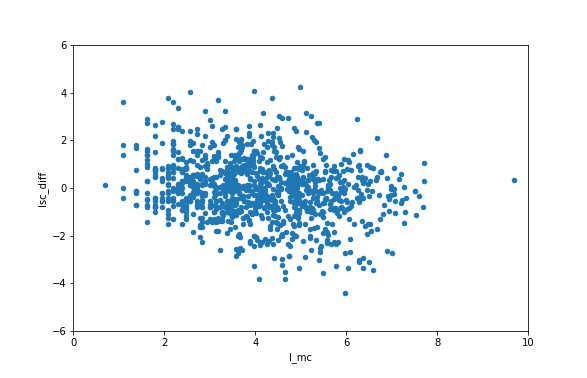

In [11]:
temp_table = main_table[main_table['sec_commits17'] > 4]
print(len(temp_table))

fig = plt.figure()
ax = plt.gca()
temp_table.plot.scatter(x='l_mc', y='lsc_diff', ax=ax)
ax.set_xlim(0,10)
ax.set_ylim(-6,6)
plt.show()

In [145]:
y = temp_table['l_mc']
X = temp_table['lsc_diff']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_mc   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1705.
Date:                Thu, 21 Jun 2018   Prob (F-statistic):          2.47e-278
Time:                        21:57:03   Log-Likelihood:                -5736.3
No. Observations:                2268   AIC:                         1.147e+04
Df Residuals:                    2267   BIC:                         1.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lsc_diff      -0.4864      0.012    -41.286      0.0

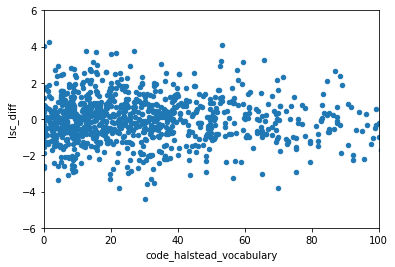

In [160]:
fig = plt.figure()
ax = plt.gca()
temp_table.plot.scatter(x='code_halstead_vocabulary', y='lsc_diff', ax=ax)
ax.set_xlim(0,100)
ax.set_ylim(-6,6)
plt.show()

In [96]:
tab = pd.DataFrame()
tab['y'] = main_table['lsc_diff']
tab['X'] = main_table['code_lloc']
tab = tab.replace([np.inf, -np.inf], np.nan).dropna()
# y = main_table['lsc_diff']
# X = main_table['code_comments_avg']
model = sm.OLS(tab.y, tab.X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           6.16e-57
Time:                        21:20:34   Log-Likelihood:                -10022.
No. Observations:                5122   AIC:                         2.005e+04
Df Residuals:                    5121   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.0016   9.67e-05    -16.101      0.0